In [8]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)

# # Configuration Roulette française
# z = 1  # Nombre de zéros
# n = 36  # Nombre de numéros (zéros exclus)
# M = 100  # Nombre de trajectoires    
# N = 100000  # Nombre de tours de roulette
# n_d = np.zeros(n - 1)
# n_d[0], n_d[1], n_d[4], n_d[7], n_d[10], n_d[16], n_d[34] = 6, 9, 22, 24, 26, 60, 37

# Configuration Roulette américaine
z = 2  # Nombre de zéros
n = 36  # Nombre de numéros (zéros exclus)
M = 100  # Nombre de trajectoires    
N = 100000  # Nombre de tours de roulette
n_d = np.zeros(n - 1)
n_d[0], n_d[1], n_d[4], n_d[7], n_d[10], n_d[16], n_d[34] = 6, 9, 22, 24, 26, 60, 37

# # Configuration Test
# z = 1  # Nombre de zéros
# n = 5  # Nombre de numéros (zéros exclus)
# M = 100  # Nombre de trajectoires    
# N = 1000  # Nombre de tours de roulette
# n_d = np.ones(n - 1)

f = n_d / np.sum(n_d)
p = lambda d: n / (n + z) / (d + 1)
fp = f * p(np.arange(1, n))
p_g = 1 - np.sum(fp)

P = np.append((p_g, -1), fp)
r = np.roots(P)

mu_real = -np.real(np.exp(np.sum(np.log(r[1] * (1 - r[2:]) / (r[1] - r[2:])))))
k_p = lambda alpha: 1 + int(np.log(-(1 - alpha) / mu_real) / np.log(np.real(r[1])))
k_half = k_p(1 / 2)
k_95 = k_p(.95)
k = np.arange(1, k_95)

V = np.vander(1 / r[1:])
mu = -np.ones(r.size - 1) @ np.linalg.inv(V)
q = np.vectorize(lambda k: 1 + np.real(mu @ r[1:] ** k))
q_k = q(k)

In [9]:
def show_phi(u0):
    du = np.random.choice(-np.arange(-1, n), size=(M, N), replace=True, p=np.append((p_g, 0), fp))
    u = u0 + np.hstack((np.zeros((M, 1)), np.cumsum(du, axis=1)))
    u_alive = ~np.cumsum(u<=0, axis=1).astype(bool)
    u_cutted = u*(u_alive)
    phi = np.mean(u_alive, axis=0)
    plt.title("Simulations Monte-Carlo de la survie d'un casino")
    plt.xlabel("nombre de tours de roulette")
    plt.ylabel("fortune (en jetons)")
    plt.plot(u.T, c='gray')
    plt.plot(u_cutted.T)
    plt.show()
    plt.title("Probabilité de non-ruine")
    plt.xlabel("nombre de tours de roulette")
    plt.ylabel("probabilité")
    plt.plot(phi)
    plt.show()

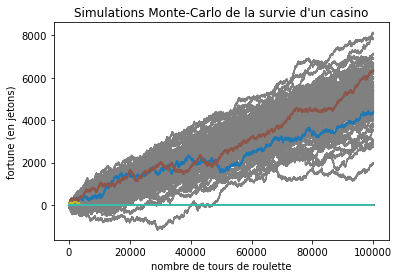

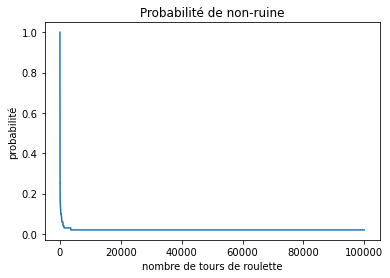

In [10]:
show_phi(1)

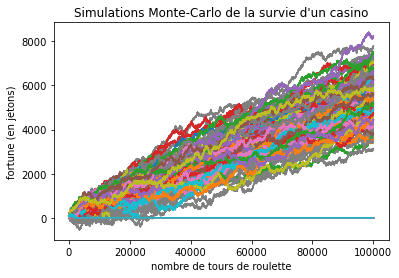

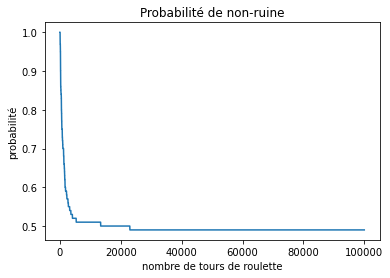

In [11]:
show_phi(k_half)

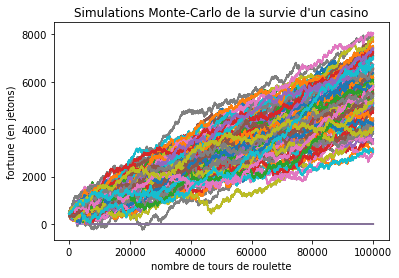

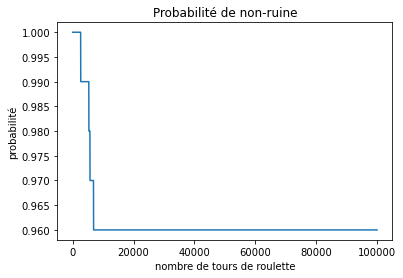

In [12]:
show_phi(k_95)

In [13]:
def phi_inf(u0):
    du = np.random.choice(-np.arange(-1, n), size=(M, N), replace=True, p=np.append((p_g, 0), fp))
    u = u0 + np.hstack((np.zeros((M, 1)), np.cumsum(du, axis=1)))
    u_alive = ~np.cumsum(u<=0, axis=1).astype(bool)
    u_cutted = u*(u_alive)
    phi = np.mean(u_alive, axis=0)
    return phi[-1]

v_phi_inf = np.vectorize(phi_inf)
phi_k = v_phi_inf(k)

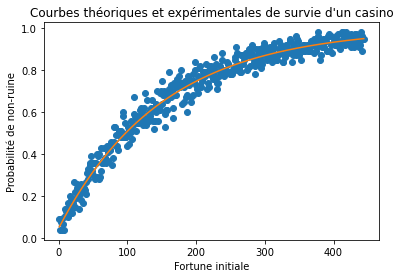

In [14]:
plt.title("Courbes théoriques et expérimentales de survie d'un casino")
plt.xlabel("Fortune initiale")
plt.ylabel("Probabilité de non-ruine")
plt.plot(k, q_k)
plt.plot(k, 1 + mu_real * np.real(r[1]) ** k)
plt.scatter(k, phi_k)
plt.show()